<a href="https://colab.research.google.com/github/Nagasai122/Covid_sentiment_analysis/blob/main/Covid_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nagasai122/Covid_sentiment_analysis/main/Coronavirus%20Tweets.csv',encoding = 'ISO-8859-1')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df.shape

(41157, 6)

In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df['TweetAt']= pd.to_datetime(df['TweetAt'])

In [ ]:
df['TweetAt'].min(), df['TweetAt'].max()

(Timestamp('2020-01-04 00:00:00'), Timestamp('2020-12-04 00:00:00'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df['Location']= df['Location'].fillna('Unknown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
df['Location'].value_counts()

Unknown                          8593
London                            540
United States                     528
London, England                   520
New York, NY                      395
                                 ... 
Uganda Kampala                      1
Views don't reflect employers       1
Charlotte, MI                       1
East Midlands, UK                   1
i love you so much || he/him        1
Name: Location, Length: 12220, dtype: int64

Text(0, 0.5, 'Tweets Count')

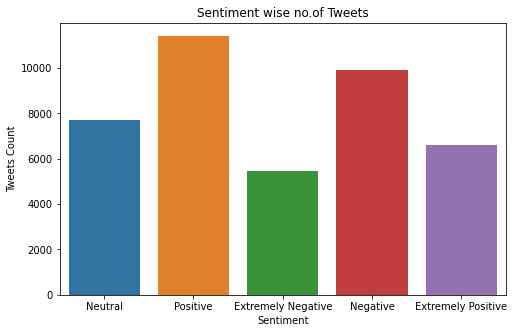

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment wise no.of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweets Count')

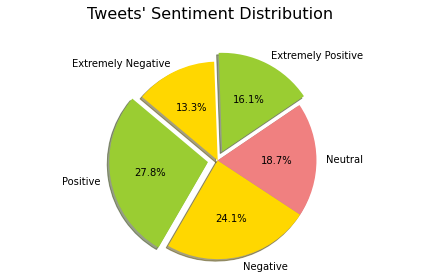

In [ ]:
# Show distribution of tweet sentiments
sentiment_dist = df.Sentiment.value_counts()

plt.pie(sentiment_dist, labels=sentiment_dist.index, explode= (0.1,0,0,0.1,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
place_df = df['Location'].value_counts().head(25)

In [ ]:
place_df

Unknown                    8593
London                      540
United States               528
London, England             520
New York, NY                395
Washington, DC              373
United Kingdom              337
Los Angeles, CA             281
India                       268
UK                          232
Australia                   225
USA                         223
England, United Kingdom     191
Canada                      191
Toronto, Ontario            160
Global                      159
Chicago, IL                 155
California, USA             153
San Francisco, CA           152
Boston, MA                  150
New York, USA               140
New Delhi, India            138
New York                    126
Atlanta, GA                 126
Mumbai, India               109
Name: Location, dtype: int64

In [ ]:
# Separating City and Country from location column

df['Country']= df.Location.apply(lambda x: x.split(",")[-1].strip() if ("," in x) else x)
df['City']= df.Location.apply(lambda x: x.split(',')[0].strip() if (','in x) else x)

In [ ]:
df['Country'].value_counts().head(30)

Unknown           8593
USA               1721
England           1547
CA                1084
India              963
NY                 710
UK                 677
London             676
United Kingdom     653
Canada             554
United States      544
Australia          484
TX                 475
DC                 413
Ontario            349
FL                 332
Nigeria            283
IL                 263
South Africa       255
MA                 253
PA                 235
GA                 194
New York           172
Ireland            172
Scotland           170
Texas              167
New Zealand        163
Global             160
NC                 155
NJ                 150
Name: Country, dtype: int64

In [ ]:
#Replacing 2 digit US states with USA

df['Country']= df.Country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!= 'uk' else x)

In [ ]:
df['Country'].value_counts().head(30)

USA                9243
Unknown            8593
England            1547
India               963
London              676
United Kingdom      653
Canada              554
United States       544
Australia           484
Ontario             349
Nigeria             283
South Africa        255
Ireland             172
New York            172
Scotland            170
Texas               167
New Zealand         163
Global              160
Kenya               141
Pakistan            138
California          137
Los Angeles         113
Florida             105
Worldwide           102
Toronto              97
Germany              97
France               93
Singapore            91
New South Wales      90
New York City        88
Name: Country, dtype: int64

In [ ]:
df['Country']= df.Country.apply(lambda x: 'USA' if x.lower().strip() \
                                in ('united states,us,north carolina ,usa,new york,boston,washington dc,arizona,chicago,ottawa,alabama,michigan,new york city,colorado,houston,indiana,nyc,seattle,california,texas,oregon,los angeles,florida,d.c.,san francisco,new jersey,ohio,illinois') else x)
df['Country']= df.Country.apply(lambda x: 'India' if x.lower().strip() in ('india,gujarat,mumbai,chennai, new delhi,bangalore,hyderabad') else x)
df['Country']= df.Country.apply(lambda x: 'UK' if x.lower().strip() in ('united kingdom, london') else x)
df['Country']= df.Country.apply(lambda x: 'Canada' if x.lower().strip() in ('ontario,toronto,victoria,british columbia,alberta') else x)
df['Country']= df.Country.apply(lambda x: 'Australia' if x.lower().strip() in ('australia, new south wales,sydney,melbourne,queensland,south australia') else x)
df['Country']= df.Country.apply(lambda x: 'UAE' if x.lower().strip() in ('dubai,united arab emirates,qatar') else x)
df['Country']= df.Country.apply(lambda x: 'Unknown' if x.lower().strip() \
                                in ('????,??????,worldwide,global,planet earth,everywhere,under the goldy fish,middlesbrough,yo mama house') else x)
df['Country']= df.Country.apply(lambda x: 'Germany' if x.lower().strip() in ('deutschland') else x)
df['Country']= df.Country.apply(lambda x: 'South Africa' if x.lower().strip() in ('johannesburg') else x)
df['Country']= df.Country.apply(lambda x: 'Nigeria' if x.lower().strip() in ('lagos') else x)

In [ ]:
df['Country'].value_counts()

USA                             12552
Unknown                          9225
England                          1547
UK                               1375
Canada                           1256
                                ...  
In the hearts and minds             1
A burgundy southern state           1
Blighty                             1
Taured                              1
i love you so much || he/him        1
Name: Country, Length: 7002, dtype: int64

In [ ]:
df['City'].value_counts()

Unknown                          8593
London                           1251
New York                          709
United States                     530
Washington                        504
                                 ... 
Harrisburg PA for now               1
Jammu &Kashmir UnionTerritory       1
Reseda                              1
Mid Yell                            1
i love you so much || he/him        1
Name: City, Length: 9725, dtype: int64

In [ ]:
# Removing countries from city column
df["City"] = df.City.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us','canada','australia','uae','england','global'] \
                                   else x)

In [ ]:
df['City'].value_counts()

Unknown                          11142
London                            1251
New York                           709
Washington                         504
Los Angeles                        414
                                 ...  
Harrisburg PA for now                1
Jammu &Kashmir UnionTerritory        1
Reseda                               1
Mid Yell                             1
i love you so much || he/him         1
Name: City, Length: 9700, dtype: int64

In [ ]:
df2 = df[df['Country']!= 'Unknown']
df2

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,-82.363649,ÃT: 36.319708
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,-78.753267,35.926541
...,...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",2020-04-14,YÂall really shitting that much more at home?...,Negative,USA,Brooklyn
41149,44948,89900,"Toronto, Ontario",2020-04-14,Still shocked by the number of #Toronto superm...,Negative,Canada,Toronto
41150,44949,89901,OHIO,2020-04-14,I never that weÂd be in a situation &amp; wor...,Positive,USA,OHIO
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,New Zealand,Wellington City


In [ ]:
df2['Country'].value_counts()

USA                             12552
England                          1547
UK                               1375
Canada                           1256
Australia                         862
                                ...  
In the hearts and minds             1
A burgundy southern state           1
Blighty                             1
Taured                              1
i love you so much || he/him        1
Name: Country, Length: 7001, dtype: int64

In [ ]:
top100_countries = df2.Country.value_counts(sort=True, ascending=False)[0:25]
top100_countries = pd.DataFrame(top100_countries)
    
top100_cities= df.City.value_counts(sort=True, ascending=False)[1:26]
top100_cities = pd.DataFrame(top100_cities)

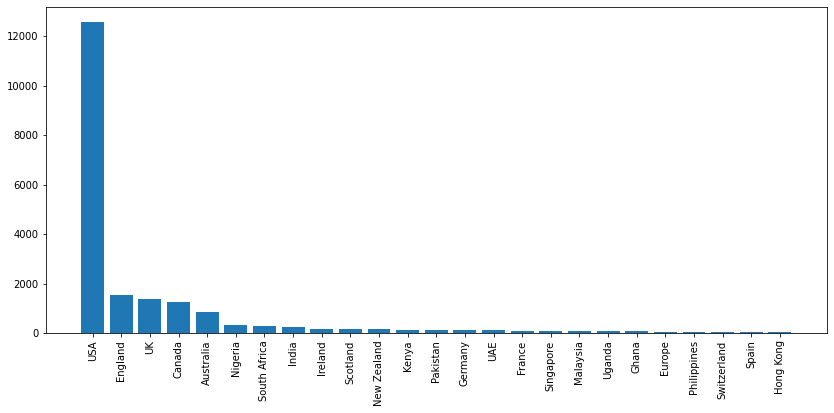

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(top100_countries.index,top100_countries.Country)
plt.xticks(rotation=90)
plt.show()

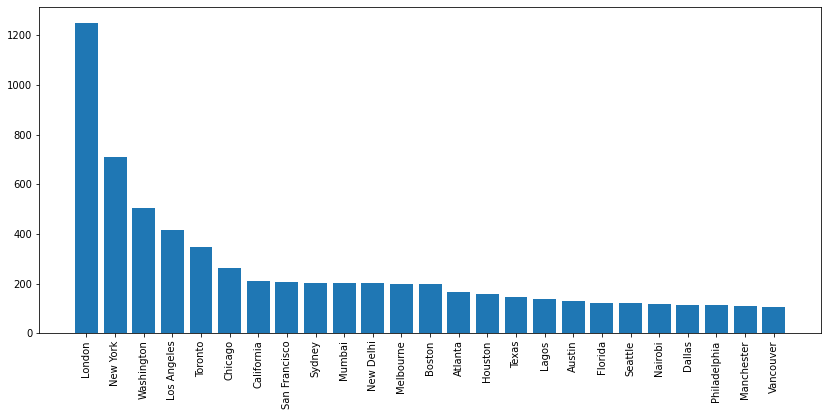

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(top100_cities.index,top100_cities.City)
plt.xticks(rotation=90)
plt.show()

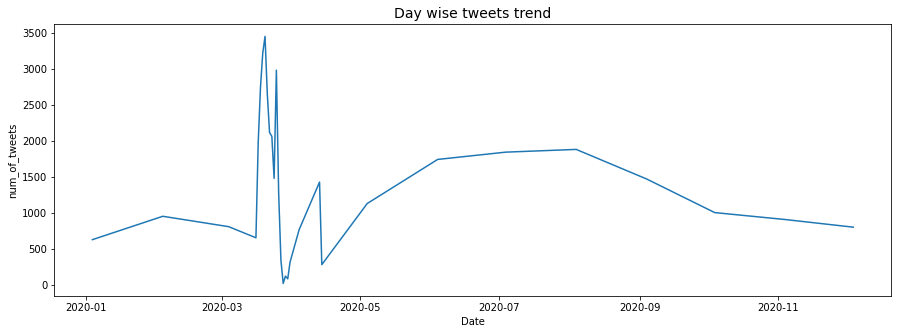

In [ ]:
daily_tweets = df.groupby(['TweetAt'])['OriginalTweet'].count()

fig= plt.figure(figsize=(15,5))
plt.plot(daily_tweets.index, daily_tweets.values)
plt.title('Day wise tweets trend',fontsize=14)
plt.xlabel('Date')
plt.ylabel('num_of_tweets')
plt.show()

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,Unknown,Unknown
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Unknown,Unknown


In [ ]:
df["Year"] = df["TweetAt"].dt.year
df["month"] = df["TweetAt"].dt.month
df["day"] = df["TweetAt"].dt.day
df["dayname"] = df["TweetAt"].dt.day_name()

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City,Year,month,day,dayname
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London,2020,3,16,Monday
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown,2020,3,16,Monday
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds,2020,3,16,Monday
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,Unknown,Unknown,2020,3,16,Monday
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Unknown,Unknown,2020,3,16,Monday


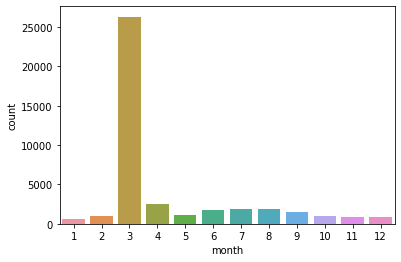

In [ ]:
sns.countplot(x=df['month'])

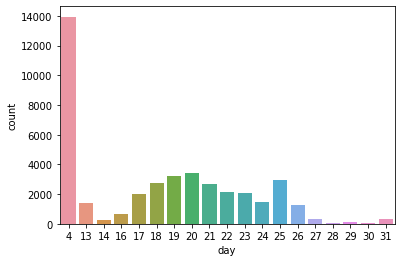

In [ ]:
sns.countplot(x=df['day'])

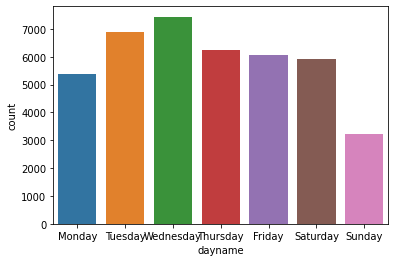

In [ ]:
sns.countplot(x=df['dayname'])

In [ ]:
df['UserName'].value_counts().sort_values(ascending=False)

3799     1
3958     1
3838     1
3808     1
3801     1
        ..
44949    1
44950    1
44951    1
44952    1
44955    1
Name: UserName, Length: 41157, dtype: int64

In [ ]:
df['UserName']= df['UserName'].astype(str)
df['ScreenName']= df['ScreenName'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  object        
 1   ScreenName     41157 non-null  object        
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   Country        41157 non-null  object        
 7   City           41157 non-null  object        
 8   Year           41157 non-null  int64         
 9   month          41157 non-null  int64         
 10  day            41157 non-null  int64         
 11  dayname        41157 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 3.8+ MB


In [ ]:
df['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
# Common text preprocessing
#1. convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)",' ',text) #removing all the punctuations, server/ web links
    return text

 
#2. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


#3. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)


#4. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#5. Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


In [ ]:
df['clean_text'] = df['OriginalTweet'].apply(lambda x: finalpreprocess(x))
# df=df.drop(columns=['word_count','char_count','unique_word_count'])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City,Year,month,day,dayname,clean_text
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London,2020,3,16,Monday,menyrbie phil gahan chrisitv
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown,2020,3,16,Monday,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds,2020,3,16,Monday,coronavirus australia woolworths give elderly ...
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,Unknown,Unknown,2020,3,16,Monday,food stock one empty please panic enough food ...
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Unknown,Unknown,2020,3,16,Monday,ready go supermarket covid19 outbreak paranoid...


In [ ]:
df.iloc[0]['clean_text']

'menyrbie phil gahan chrisitv'

In [ ]:
def createWordCloud(input_type, text):
    """
    Function to generate the wordcloud

    """
    wordcloud = WordCloud(width = 1000, height = 600, 
                      background_color ='white',
                      collocations = False,
                      stopwords=stop_words
                     ).generate(text)

    plt.figure(figsize = (12, 12), facecolor = None)
    plt.title("Most common "+ input_type +" in the tweets \n", fontsize=20, color='Black')
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

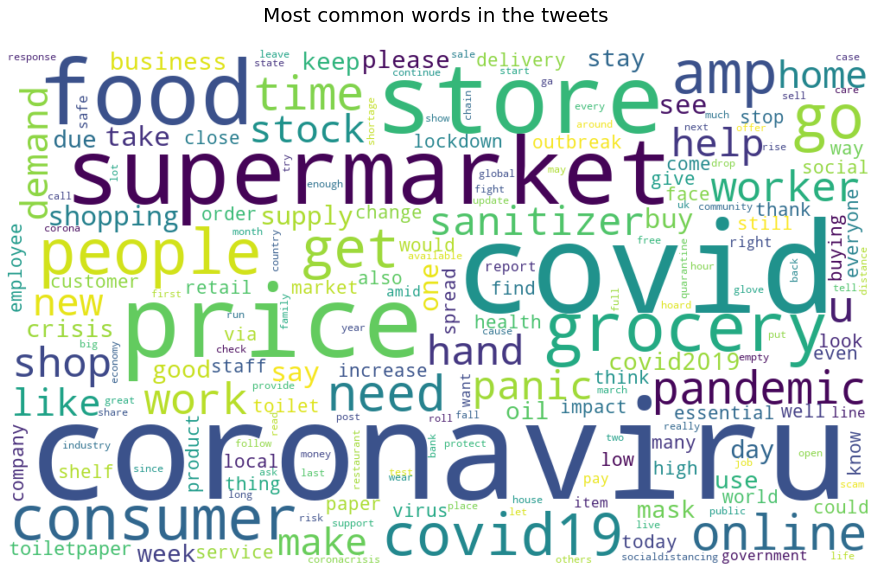

In [ ]:
text = '' 
stop_words = set(stopwords.words("english"))
for row in df['clean_text']:
    # typecaste each row to string and split it to get tokens
    tokens = str(row).split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "

createWordCloud("words",text)

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_tweets = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_tweets, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_tweets.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

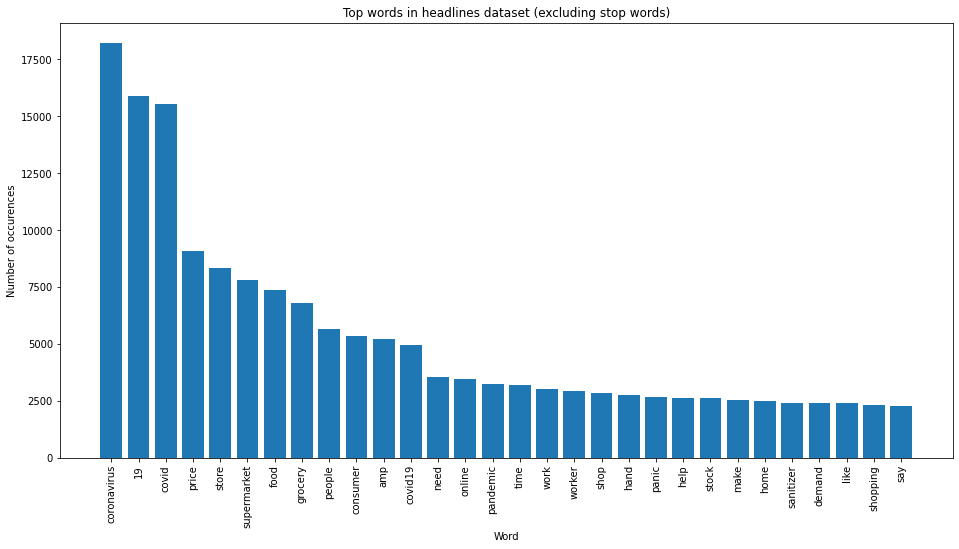

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=30,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df.clean_text)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
def modified_sentiment(x):
  if x=='Positive' or x=='Extremely Positive':
    return 1
  elif x=='Neutral':
    return 0
  else:
    return -1

In [ ]:
df['target']= df['Sentiment'].apply(modified_sentiment)
df.head()
df.drop(columns=['Sentiment'],axis=1,inplace=True)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Country,City,Year,month,day,dayname,clean_text,target
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,UK,London,2020,3,16,Monday,menyrbie phil gahan chrisitv,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,USA,Unknown,2020,3,16,Monday,advice talk neighbour family exchange phone nu...,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Vagabonds,Vagabonds,2020,3,16,Monday,coronavirus australia woolworths give elderly ...,1
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Unknown,Unknown,2020,3,16,Monday,food stock one empty please panic enough food ...,1
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Unknown,Unknown,2020,3,16,Monday,ready go supermarket covid19 outbreak paranoid...,-1


In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 

X_train, X_val, y_train, y_val = train_test_split(df["clean_text"],df["target"],test_size=0.25,shuffle=True)

X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

In [ ]:
#TF-IDF

# Convert x_train to vector since model can only run on numbers and not words- Fit and transform

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec

# Only transform x_test (not fit and transform)

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

          -1       0.81      0.81      0.81      3942
           0       0.72      0.61      0.66      1842
           1       0.81      0.86      0.83      4506

    accuracy                           0.80     10290
   macro avg       0.78      0.76      0.77     10290
weighted avg       0.79      0.80      0.79     10290

Confusion Matrix: [[3193  222  527]
 [ 324 1125  393]
 [ 411  223 3872]]


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

          -1       0.75      0.63      0.69      3942
           0       0.76      0.01      0.02      1842
           1       0.59      0.91      0.71      4506

    accuracy                           0.64     10290
   macro avg       0.70      0.52      0.47     10290
weighted avg       0.68      0.64      0.58     10290

Confusion Matrix: [[2493    5 1444]
 [ 416   19 1407]
 [ 420    1 4085]]


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Support vector classifier(tf-idf)

from sklearn.svm import SVC #Support vector classifier
svmc = SVC()
svmc.fit(X_train_vectors_tfidf, y_train)


#Predict y value for test dataset
y_predict = svmc.predict(X_val_vectors_tfidf)
# y_prob = svmc.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3859
           0       0.74      0.58      0.65      1886
           1       0.79      0.85      0.82      4545

    accuracy                           0.78     10290
   macro avg       0.77      0.74      0.75     10290
weighted avg       0.78      0.78      0.78     10290

Confusion Matrix: [[3085  215  559]
 [ 334 1103  449]
 [ 520  179 3846]]


In [ ]:
#FITTING THE CLASSIFICATION MODEL using LGBM Classifier(tf-idf)

import lightgbm as lgb
lgbm= lgb.LGBMClassifier()
lgbm.fit(X_train_vectors_tfidf, y_train)

y_pred = lgbm.predict(X_val_vectors_tfidf)

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3859
           0       0.74      0.58      0.65      1886
           1       0.79      0.85      0.82      4545

    accuracy                           0.78     10290
   macro avg       0.77      0.74      0.75     10290
weighted avg       0.78      0.78      0.78     10290

Confusion Matrix: [[3085  215  559]
 [ 334 1103  449]
 [ 520  179 3846]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_vectors_tfidf, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_vectors_tfidf, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_val_vectors_tfidf,y_val) 

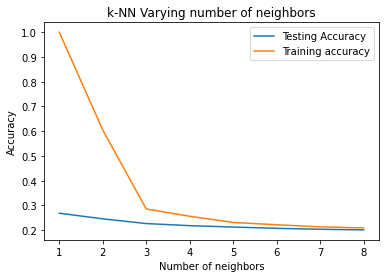

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_vectors_tfidf, y_train)

y_pred = knn.predict(X_val_vectors_tfidf)

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))


              precision    recall  f1-score   support

          -1       0.78      0.80      0.79      3859
           0       0.74      0.58      0.65      1886
           1       0.79      0.85      0.82      4545

    accuracy                           0.78     10290
   macro avg       0.77      0.74      0.75     10290
weighted avg       0.78      0.78      0.78     10290

Confusion Matrix: [[3085  215  559]
 [ 334 1103  449]
 [ 520  179 3846]]


In [ ]:
label = df.target
label= pd.get_dummies(label)
label

,-1,0,1
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
41152,0,1,0
41153,1,0,0
41154,0,0,1
41155,0,1,0


In [ ]:
tweet= df.clean_text.values
tweet

array(['menyrbie phil gahan chrisitv',
       'advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shop account po adequate supply regular med order',
       'coronavirus australia woolworths give elderly disable dedicate shopping hour amid covid 19 outbreak',
       ...,
       'know get tough kameronwilds ration toilet paper coronavirus toiletpaper kroger martinsville help u',
       'wrong smell hand sanitizer start turn coronavirus covid19 coronavirus',
       'tartiicat well new use rift go 700 00 amazon rn although normal market price usually 400 00 price really crazy right vr headset since hl alex announce bad covid 19 whethe'],
      dtype=object)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(tweet)

In [ ]:
vocab_size= len(tokenizer.word_index)+1
vocab_size

49663

In [ ]:
maxlen = 200

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout,  SpatialDropout1D, MaxPool1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import asarray
from numpy import zeros


embedding_dict = dict()
glove_file = open('/content/drive/MyDrive/glove.6B.100d.txt',encoding='utf8')

for w in glove_file:
    records = w.split()
    word = records[0]
    #vector_dimensions = asarray(records[1:], dtype='float32')
    #embedding_dict[word] = vector_dimensions
    embedding_dict[word] = np.array(records[1:], dtype=np.float64)
glove_file.close()

In [ ]:
# Create Embedding Matrix having 200 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 

X_TRAIN,X_TEST, Y_TRAIN, Y_TEST = train_test_split(padded_sequence,label,test_size=0.25,shuffle=True)


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
snn_model.add(embedding_layer)
snn_model.add(Flatten())
snn_model.add(Dense(3, activation='softmax'))
snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(snn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          4966300   
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 3)                 60003     
                                                                 
Total params: 5,026,303
Trainable params: 5,026,303
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Model training

snn_model_history = snn_model.fit(X_TRAIN,Y_TRAIN, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
193/193 [==============================] - 16s 72ms/step - loss: 0.5251 - acc: 0.6029 - val_loss: 0.4773 - val_acc: 0.6582
Epoch 2/6
193/193 [==============================] - 15s 76ms/step - loss: 0.4076 - acc: 0.7386 - val_loss: 0.4281 - val_acc: 0.7132
Epoch 3/6
193/193 [==============================] - 16s 84ms/step - loss: 0.3219 - acc: 0.8195 - val_loss: 0.4015 - val_acc: 0.7410
Epoch 4/6
193/193 [==============================] - 16s 85ms/step - loss: 0.2548 - acc: 0.8751 - val_loss: 0.3915 - val_acc: 0.7527
Epoch 5/6
193/193 [==============================] - 14s 70ms/step - loss: 0.2020 - acc: 0.9140 - val_loss: 0.3912 - val_acc: 0.7600
Epoch 6/6
193/193 [==============================] - 14s 75ms/step - loss: 0.1594 - acc: 0.9408 - val_loss: 0.3985 - val_acc: 0.7572


In [ ]:
score = snn_model.evaluate(X_TEST,Y_TEST, verbose=1)

322/322 [==============================] - 2s 5ms/step - loss: 0.3897 - acc: 0.7660


In [ ]:
from keras.layers import Conv1D

In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
cnn_model.add(embedding_layer)
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          4966300   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 5,030,815
Trainable params: 5,030,815
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cnn_model_history = cnn_model.fit(X_TRAIN,Y_TRAIN, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
193/193 [==============================] - 97s 495ms/step - loss: 0.4778 - acc: 0.6472 - val_loss: 0.4116 - val_acc: 0.7217
Epoch 2/6
193/193 [==============================] - 70s 366ms/step - loss: 0.3292 - acc: 0.8039 - val_loss: 0.3575 - val_acc: 0.7817
Epoch 3/6
193/193 [==============================] - 72s 372ms/step - loss: 0.2457 - acc: 0.8739 - val_loss: 0.3417 - val_acc: 0.8016
Epoch 4/6
193/193 [==============================] - 69s 360ms/step - loss: 0.1845 - acc: 0.9180 - val_loss: 0.3460 - val_acc: 0.8011
Epoch 5/6
193/193 [==============================] - 70s 364ms/step - loss: 0.1348 - acc: 0.9489 - val_loss: 0.3623 - val_acc: 0.8001
Epoch 6/6
193/193 [==============================] - 72s 374ms/step - loss: 0.0935 - acc: 0.9707 - val_loss: 0.3781 - val_acc: 0.7983


In [ ]:
score2 = cnn_model.evaluate(X_TEST,Y_TEST, verbose=1)

322/322 [==============================] - 6s 18ms/step - loss: 0.3575 - acc: 0.8134


In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
lstm_model.add(embedding_layer)
lstm_model.add(SpatialDropout1D(0.25))
lstm_model.add(LSTM(150))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          4966300   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 3)                 453       
                                                                 
Total params: 5,117,353
Trainable params: 5,117,353
Non-trainable params: 0
______________________________________________

In [ ]:
lstm_model_history = lstm_model.fit(X_TRAIN,Y_TRAIN, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
193/193 [==============================] - 188s 955ms/step - loss: 0.5057 - acc: 0.6155 - val_loss: 0.4269 - val_acc: 0.7051
Epoch 2/6
193/193 [==============================] - 189s 981ms/step - loss: 0.3814 - acc: 0.7475 - val_loss: 0.3438 - val_acc: 0.7792
Epoch 3/6
193/193 [==============================] - 233s 1s/step - loss: 0.2975 - acc: 0.8187 - val_loss: 0.3131 - val_acc: 0.8102
Epoch 4/6
193/193 [==============================] - 210s 1s/step - loss: 0.2464 - acc: 0.8555 - val_loss: 0.2955 - val_acc: 0.8264
Epoch 5/6
193/193 [==============================] - 198s 1s/step - loss: 0.2123 - acc: 0.8795 - val_loss: 0.2989 - val_acc: 0.8207
Epoch 6/6
193/193 [==============================] - 183s 948ms/step - loss: 0.1802 - acc: 0.9023 - val_loss: 0.3108 - val_acc: 0.8262


In [ ]:
score2 = lstm_model.evaluate(X_TEST,Y_TEST, verbose=1)

322/322 [==============================] - 40s 125ms/step - loss: 0.3000 - acc: 0.8376


In [ ]:
from tensorflow.keras.layers import Bidirectional

bilstm_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
bilstm_model.add(embedding_layer)
# bilstm_model.add(SpatialDropout1D(0.25))
bilstm_model.add(Bidirectional(LSTM(128)))
# bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(3, activation='softmax'))
bilstm_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(bilstm_model.summary())

NameError: ignored

In [ ]:
bilstm_model_history = bilstm_model.fit(X_TRAIN,Y_TRAIN, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

NameError: ignored

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_TRAIN,Y_TRAIN,validation_data=(X_TEST, Y_TEST), epochs=5, batch_size=64)

Epoch 1/5
483/483 [==============================] - 258s 525ms/step - loss: 0.4983 - accuracy: 0.6047 - val_loss: 0.3643 - val_accuracy: 0.7568
Epoch 2/5
483/483 [==============================] - 270s 559ms/step - loss: 0.3186 - accuracy: 0.8089 - val_loss: 0.3199 - val_accuracy: 0.8118
Epoch 3/5
483/483 [==============================] - 267s 552ms/step - loss: 0.2686 - accuracy: 0.8466 - val_loss: 0.3011 - val_accuracy: 0.8242
Epoch 4/5
483/483 [==============================] - 257s 532ms/step - loss: 0.2478 - accuracy: 0.8627 - val_loss: 0.2958 - val_accuracy: 0.8327
Epoch 5/5
483/483 [==============================] - 257s 533ms/step - loss: 0.2432 - accuracy: 0.8661 - val_loss: 0.3030 - val_accuracy: 0.8304


In [ ]:
model.evaluate(X_TEST,Y_TEST)

322/322 [==============================] - 19s 59ms/step - loss: 0.3030 - accuracy: 0.8304


[0.3030049204826355, 0.8304178714752197]

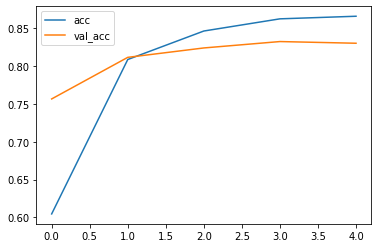

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

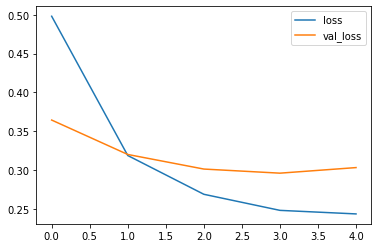

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Bidirectional

embedding_vector_length = 32
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model1.add(SpatialDropout1D(0.25))
model1.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model1.add(Dropout(0.2))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 603       
                                                                 
Total params: 267,003
Trainable params: 267,003
Non-tr

In [ ]:
history1 = model1.fit(X_TRAIN,Y_TRAIN,validation_data=(X_TEST, Y_TEST), epochs=5, batch_size=64)

Epoch 1/5
483/483 [==============================] - 510s 1s/step - loss: 0.4889 - accuracy: 0.6212 - val_loss: 0.3634 - val_accuracy: 0.7692
Epoch 2/5
483/483 [==============================] - 487s 1s/step - loss: 0.3189 - accuracy: 0.8075 - val_loss: 0.3597 - val_accuracy: 0.7804
Epoch 3/5
483/483 [==============================] - 500s 1s/step - loss: 0.2713 - accuracy: 0.8470 - val_loss: 0.2983 - val_accuracy: 0.8267
Epoch 4/5
483/483 [==============================] - 512s 1s/step - loss: 0.2493 - accuracy: 0.8609 - val_loss: 0.3026 - val_accuracy: 0.8290
Epoch 5/5
483/483 [==============================] - 499s 1s/step - loss: 0.2366 - accuracy: 0.8690 - val_loss: 0.3004 - val_accuracy: 0.8300


In [ ]:
model1.evaluate(X_TEST,Y_TEST)

322/322 [==============================] - 32s 100ms/step - loss: 0.3004 - accuracy: 0.8300


[0.30037447810173035, 0.8300291299819946]

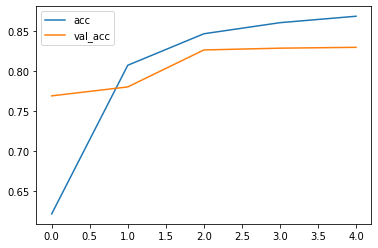

In [ ]:
plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

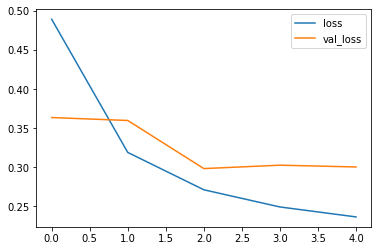

In [ ]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [ ]:

embedding_vector_length = 32
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model2.add(MaxPool1D(1))
model2.add(LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model2.add(Dropout(0.2))
model2.add(Dense(3, activation='softmax'))
model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           160000    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 200, 32)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 213,503
Trainable params: 213,503
Non-trainable params: 0
__________________________________________________

In [ ]:
history2 = model2.fit(X_TRAIN,Y_TRAIN,validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
386/386 [==============================] - 208s 529ms/step - loss: 0.5149 - accuracy: 0.5874 - val_loss: 0.3899 - val_accuracy: 0.7373
Epoch 2/5
386/386 [==============================] - 200s 519ms/step - loss: 0.3304 - accuracy: 0.7980 - val_loss: 0.3317 - val_accuracy: 0.7940
Epoch 3/5
386/386 [==============================] - 201s 520ms/step - loss: 0.2747 - accuracy: 0.8438 - val_loss: 0.3253 - val_accuracy: 0.8026
Epoch 4/5
386/386 [==============================] - 201s 520ms/step - loss: 0.2476 - accuracy: 0.8613 - val_loss: 0.3161 - val_accuracy: 0.8162
Epoch 5/5
386/386 [==============================] - 199s 516ms/step - loss: 0.2380 - accuracy: 0.8658 - val_loss: 0.3182 - val_accuracy: 0.8167


In [ ]:
model2.evaluate(X_TEST,Y_TEST)

322/322 [==============================] - 19s 60ms/step - loss: 0.3144 - accuracy: 0.8195


[0.31442707777023315, 0.8195335268974304]